# <a href="https://thetahat.ru/courses/bm-2024-aut">Статистика ФБМФ</a>
## Домашнее задание 12

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_st_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 15 баллов
* Задача 2 &mdash; 25 баллов
* Задача 2 &mdash; 35 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 4 &mdash; 30 баллов


-----

In [2]:
# Bot check

# HW_ID: st_hw12
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [3]:
import pandas as pd
import numpy as np
from tqdm import tqdm as tqdm
from scipy import integrate
import scipy.stats as sps
from scipy.stats import ttest_rel, ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm as tqdm

sns.set(font_scale=1.3, palette='Set2')
%matplotlib inline

**ВАЖНОЕ ЗАМЕЧАНИЕ**: выбирая статистический тест и интерпретируя результаты, помните о нулевой гипотезе и мощности. Например, немного об этом в контексте АВ тестов можно почитать [здесь](https://habr.com/ru/companies/avito/articles/709596/).

## <b><i><font color="blue">Легкая часть</font></i></b>


### Задача 1


Рассмотрим данные об экспрессии белка DYRK1_A в мышах в разные дни. Загрузите датасет с сайта курса. Постройте гистограммы распределений и проведите t-test, чтобы выяснить, различается ли средний уровень экспрессии белка в день 1 и 2.

In [5]:
df = pd.read_csv('/content/mice_expression.csv')
df.head()

,MouseID,Day 1,Day 2
0,309_1,0.503644,0.579893
1,309_2,0.514617,0.305341
2,309_3,0.509183,0.972346
3,309_4,0.442107,0.527091
4,309_5,0.434940,0.517172


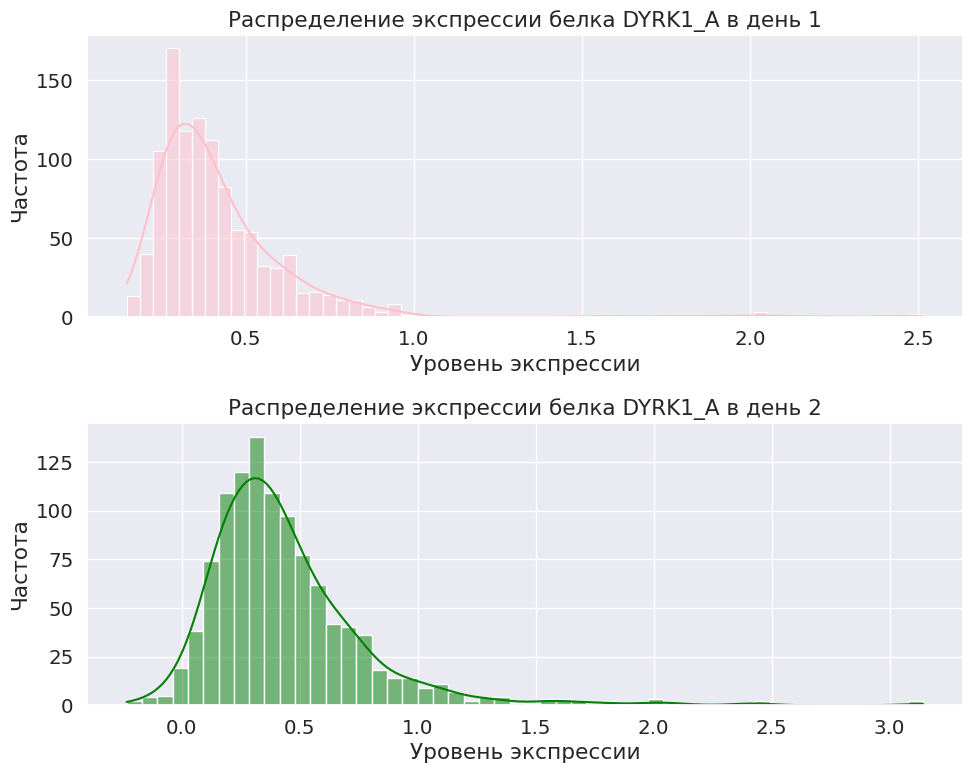

In [3]:
plt.figure(figsize=(10,8))
plt.subplot(2, 1, 1)
sns.histplot(df['Day 1'], kde=True, color='pink')
plt.title('Распределение экспрессии белка DYRK1_A в день 1')
plt.xlabel('Уровень экспрессии')
plt.ylabel('Частота')

plt.subplot(2, 1, 2)
sns.histplot(df['Day 2'], kde=True, color='green')
plt.title('Распределение экспрессии белка DYRK1_A в день 2')
plt.xlabel('Уровень экспрессии')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

распределение несимметричное, наибольшее значение около 0.5

In [4]:
ttest_rel(df['Day 1'], df['Day 2'])

TtestResult(statistic=-2.1925908404058365, pvalue=0.028550423276649355, df=1076)

Объясните выбор теста и сделайте выводы.

**Вывод:** эти выборки связные, потому что элементы одной выборки связаны с другой.
также судя по гистограммам, распределения похожи на нормальные, хоть и с выбросами.
поэтому выбираем именно ttest_rel

### Задача 2


Рассмотрим [данные о расстройствах сна](https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset?select=Sleep_health_and_lifestyle_dataset.csv):

Датасет содержит информацию о образе жизни людей, целевая переменная — есть ли у них расстройство сна.

С помощью методов дисперсионного анализа исследуйте, по каким параметрам наблюдается различие между двумя рассматриваемыми классами (теми, у кого есть расстройство сна и теми, у кого нет).

Скачайте файл и оставьте колонки:
* `Age` &mdash; возраст;
* `Sleep Duration` &mdash; длительность сна;
* `Physical Activity Level` &mdash; уровень физической активности;
* `Heart Rate` &mdash; ЧСС;
* `Daily Steps` &mdash; число пройденных шагов в день;
* `Sleep Disorder` &mdash; целевая переменная;

In [100]:
data = pd.read_csv('/content/Sleep_health_and_lifestyle_dataset.csv')

In [101]:
columns = ['Age', 'Sleep Duration',
           'Physical Activity Level', 'Heart Rate', 'Daily Steps', 'Sleep Disorder']

In [102]:
data = data[columns]
data

,Age,Sleep Duration,Physical Activity Level,Heart Rate,Daily Steps,Sleep Disorder
0,27,6.1,42,77,4200,NaN
1,28,6.2,60,75,10000,NaN
2,28,6.2,60,75,10000,NaN
3,28,5.9,30,85,3000,Sleep Apnea
4,28,5.9,30,85,3000,Sleep Apnea
...,...,...,...,...,...,...
369,59,8.1,75,68,7000,Sleep Apnea
370,59,8.0,75,68,7000,Sleep Apnea
371,59,8.1,75,68,7000,Sleep Apnea
372,59,8.1,75,68,7000,Sleep Apnea


Для упрощения задачи не будем рассматривать вид расстройства сна &mdash; только есть оно или нет.

In [103]:
data['Sleep Disorder'].fillna('None', inplace=True)
dis = data.loc[:, 'Sleep Disorder'].copy()
dis[dis != 'None'] = 'Disorder'
data.loc[:, 'Sleep Disorder'] = dis
data

<ipython-input-103-bffcbfd92b60>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Sleep Disorder'].fillna('None', inplace=True)


,Age,Sleep Duration,Physical Activity Level,Heart Rate,Daily Steps,Sleep Disorder
0,27,6.1,42,77,4200,None
1,28,6.2,60,75,10000,None
2,28,6.2,60,75,10000,None
3,28,5.9,30,85,3000,Disorder
4,28,5.9,30,85,3000,Disorder
...,...,...,...,...,...,...
369,59,8.1,75,68,7000,Disorder
370,59,8.0,75,68,7000,Disorder
371,59,8.1,75,68,7000,Disorder
372,59,8.1,75,68,7000,Disorder


Визуализируйте распределение признаков при разных значениях целевой переменной (например, с помощью pairplot)

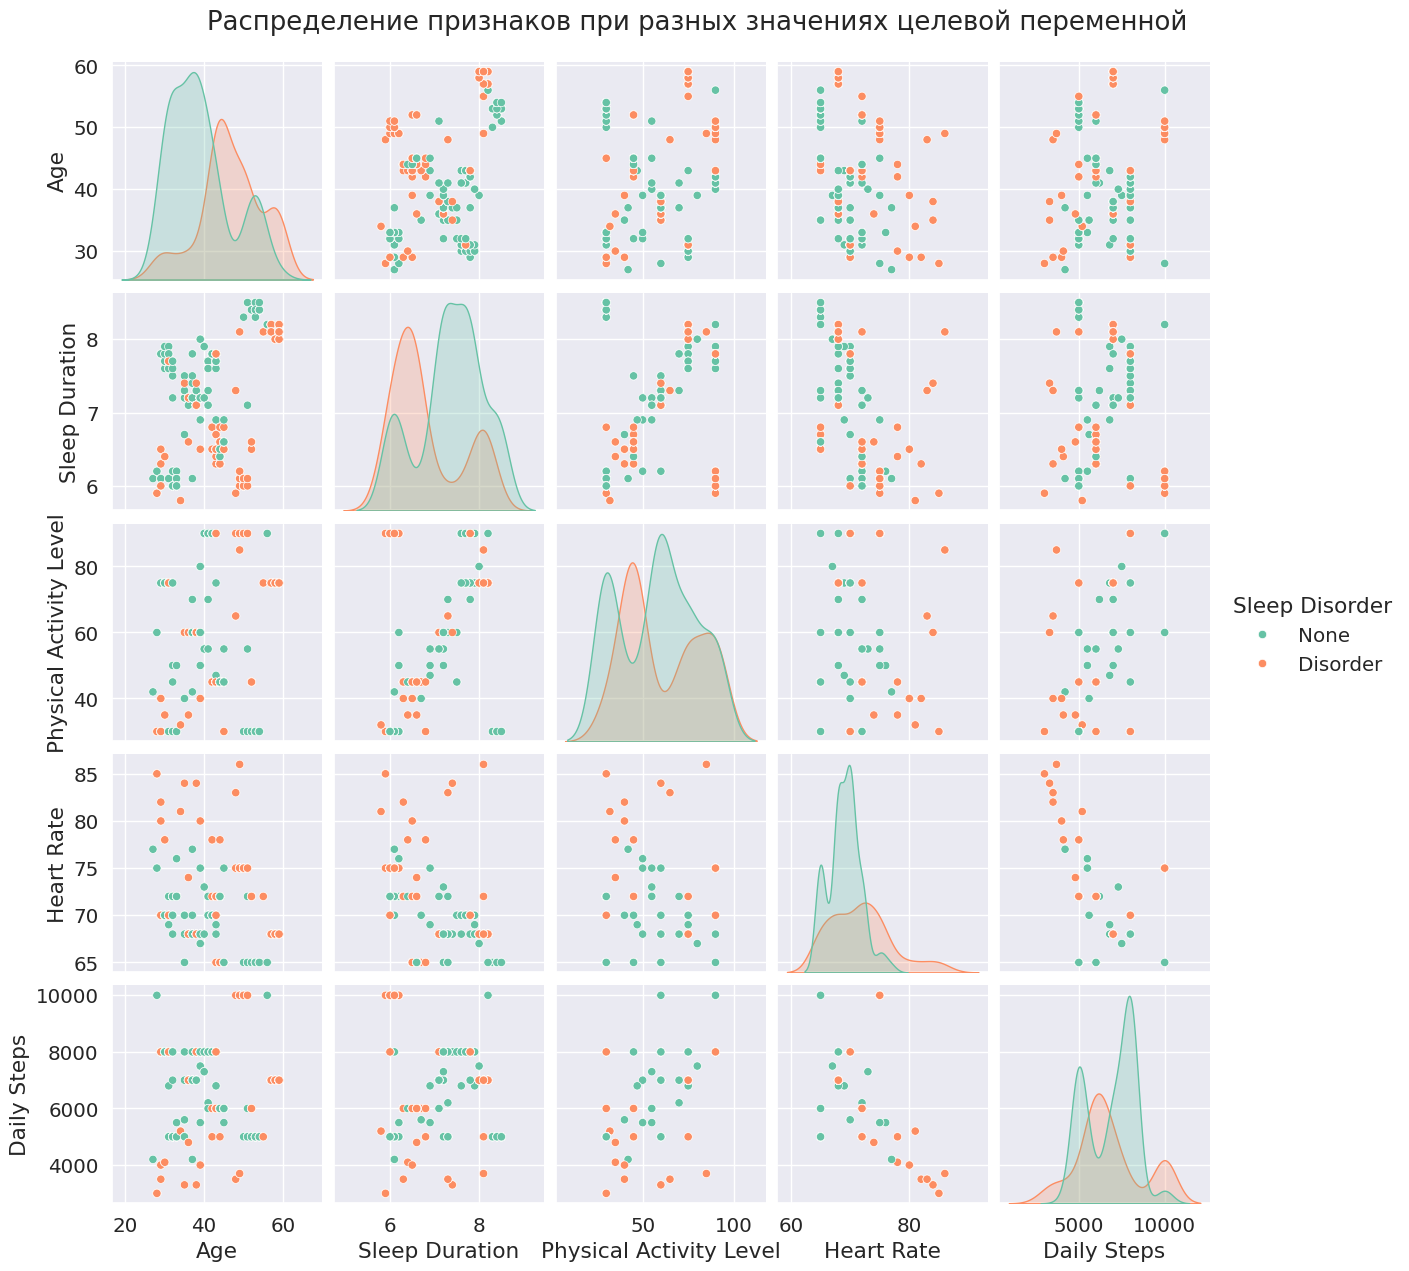

In [9]:
sns.pairplot(data, hue='Sleep Disorder', diag_kind='kde')
plt.suptitle('Распределение признаков при разных значениях целевой переменной', y=1.02)
plt.show()

Насколько сильно отличаются распределения между классами? Есть ли очевидные отличия?

**Вывод:** для всех признаков распределение разное для разных классов.


распределение возраста для класса disorder смещено в сторону более старших возрастов.


sleep duration: у класса disorder наблюдается небольшой сдвиг в сторону меньшей продолжительности сна.


physical activity level:
распределения перекрываются, но у disorder сдвиг в сторону меньших значений уровня физической активности.


heart rate:
для класса disorder смещено в сторону более высоких значений частоты сердечных сокращений


daily steps:
распределение для класса disorder смещено в сторону меньшего количества шагов в день

Оцените, по каким признакам различаются классы. Объясните выбор статистического теста.

классы различаются по всем признакам, распределение нельзя определить

In [109]:
group_none = data[data['Sleep Disorder'] == 'None']
group_disorder = data[data['Sleep Disorder'] == 'Disorder']
results = []
for column in columns[:-1]:
    stat, p = mannwhitneyu(group_none[column], group_disorder[column], alternative='two-sided')
    results.append([column, stat, p])

Оформите результаты в таблице pandas

In [110]:
results = pd.DataFrame(results, columns=['feature', 'stat', 'p-value'])

In [111]:
results

,feature,stat,p-value
0,Age,8011.0,2.998305e-18
1,Sleep Duration,23039.0,3.637710e-09
2,Physical Activity Level,15576.0,1.687369e-01
3,Heart Rate,11546.0,7.916085e-08
4,Daily Steps,18413.0,1.539960e-01


Какой тест вы использовали? Какие выводы можно сделать по p-value?

**Вывод:** тест должен быть не параметрическим, все элементы независимые -> тест манн-уитни

по всем p-value можно сделать вывод, что гипотеза отвергается и различие между классами есть для признаков Age, Slepp Duration и Heart Rate, различие для признака Age наибольшее, так как p-value наименьший

Достаточно ли в этом случае только посчитать p-value или надо еще что-то сделать? Если да, то реализуйте алгоритм


стоит еще что-то сделать, потому что у оставшихся признаков явно есть различия, но тест их не показал

### Задача 3

Обычно в практических задачах используют t-test из-за его легкой интерпретируемости. Однако нередко можно встретить и использование критерия Манн-Уитни, но (ОСТОРОЖНО СПОЙЛЕРЫ) не всегда это уместно и могут произойти совсем неожиданные вещи.

**1.** Сгенерируем выборки из смеси экспоненциальных распределений. Основная часть объектов будет иметь небольшое среднее и лишь некоторые из них &mdash; достаточно большое.

In [22]:
def generate_mix_expon(sample_sizes=[100, 10], scale=[1, 10]):
    ''' Генерация выборки из смеси двух экспоненциальных распределений. '''

    x1 = np.random.exponential(size=sample_sizes[0], scale=scale[0])
    x2 = np.random.exponential(size=sample_sizes[1], scale=scale[1])
    return np.concatenate([x1, x2])

Во второй выборке немного увеличим среднее первой компоненты и сильно уменьшим среднее второй

In [23]:
x = generate_mix_expon(sample_sizes=[1000, 100], scale=[1, 15])
y = generate_mix_expon(sample_sizes=[1000, 100], scale=[1.2, 10])

Визуализируйте распределение выборок

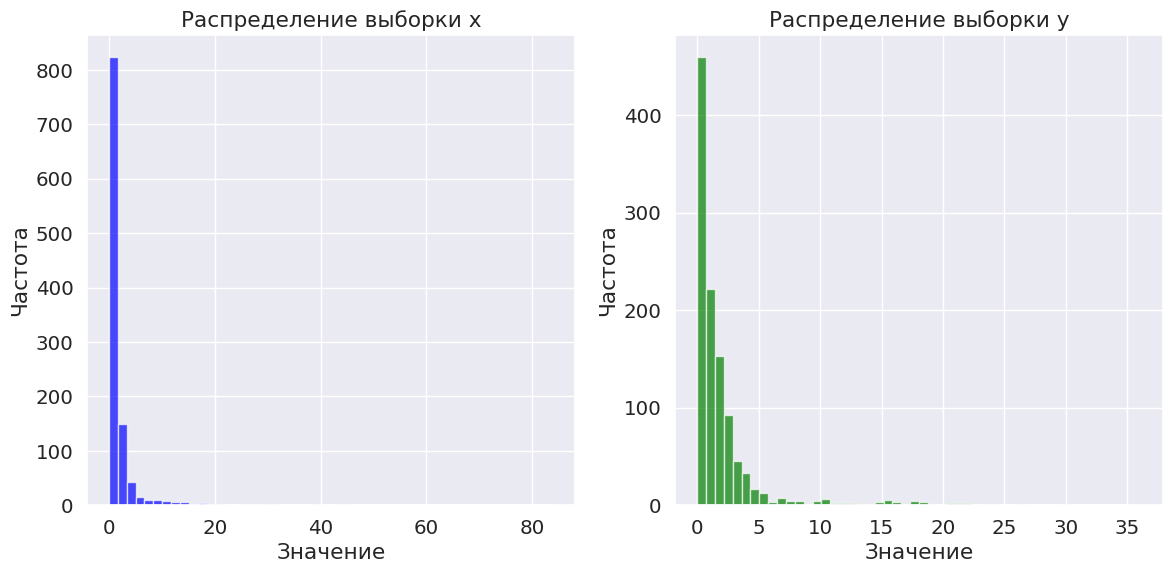

In [13]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(x, bins=50, alpha=0.7, color='blue')
plt.title('Распределение выборки x')
plt.xlabel('Значение')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
plt.hist(y, bins=50, alpha=0.7, color='green')
plt.title('Распределение выборки y')
plt.xlabel('Значение')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

у выборки Х ольшинство значений около нуля, так как бОльшая часть выборки генерируется с scale=1.
но есть 100 значений с scale=15, из-за этого на гистограмме виден хвост около больших значений.


у выборки У всё аналогично, только хвост не такой выраженный, так как значения с scale=10 меньше, чем значения с scale=15.

Как отличается среднее у этих двух выборок?

In [14]:
print('среднее выборки х',np.mean(x))
print('среднее выборки у',np.mean(y))

среднее выборки х 2.247470621150736
среднее выборки у 2.008720013106588


**Ответ:** у выборки Х среднее больше, потому что много в нейм много значений с большим средним.

**2.** Проверьте с помощью t-test гипотезу об отсутствии эффекта против альтернативы *положительного* эффекта

In [20]:
ttest_ind(x, y, alternative='less')

TtestResult(statistic=1.1610473655673492, pvalue=0.8771256431727794, df=2198.0)

Какой результат проверки гипотезы:

**Ответ:** t-test не отвергает гипотезу об отсутствии эффекта против альтернативы положительного эффекта

Проверьте с помощью критерий Манна-Уитни гипотезу об отсутствии эффекта против альтернативы *положительного* эффекта

In [27]:
from scipy.stats import mannwhitneyu
mannwhitneyu(x, y, alternative='less')

MannwhitneyuResult(statistic=556691.0, pvalue=0.0005919411917142152)

Прокомментируйте результат.

**Ответ** критерий Манна-Уитни отвергает в пользу наличия положительного эффекта

Не редко при работе с выбросами аналитики начинают логарифмировать метрики, т.к. после такой процедуры данные становятся примерно одинаковыми. Проведите подобный эксперимент, передав в критерий t-test прологарифмированные значения.

In [24]:
ttest_ind(np.log(x), np.log(y), alternative='less')

TtestResult(statistic=-1.8306784900465798, pvalue=0.03364193485127359, df=2198.0)

Text(0, 0.5, 'Частота')

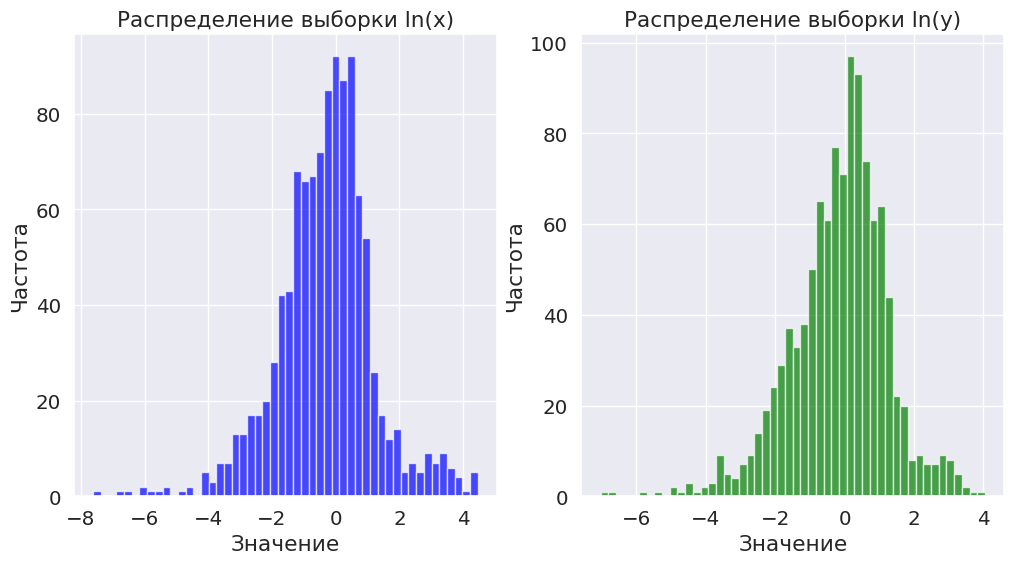

In [52]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(np.log(x), bins=50, alpha=0.7, color='blue')
plt.title('Распределение выборки ln(x)')
plt.xlabel('Значение')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
plt.hist(np.log(y), bins=50, alpha=0.7, color='green')
plt.title('Распределение выборки ln(y)')
plt.xlabel('Значение')
plt.ylabel('Частота')

**3.** А вдруг все эти результаты -- лишь случайное стечение обстоятельств? Давайте проведем серию экспериментов, посчитаем разницу средних и проверим критерии

In [28]:
n_iter = 2_000

diff_array = np.zeros(n_iter)
stats_array = np.zeros((3, n_iter))

for i in range(n_iter):
    x = generate_mix_expon(sample_sizes=[1000, 100], scale=[1, 15])
    y = generate_mix_expon(sample_sizes=[1000, 100], scale=[1.2, 10])

    diff_array[i] = x.mean() - y.mean()
    stats_array[0, i] = ttest_ind(x, y, alternative='less')[0]
    stats_array[1, i] = ttest_ind(np.log(x), np.log(y), alternative='less')[0]
    stats_array[2, i] =  mannwhitneyu(x, y, alternative='less')[0]

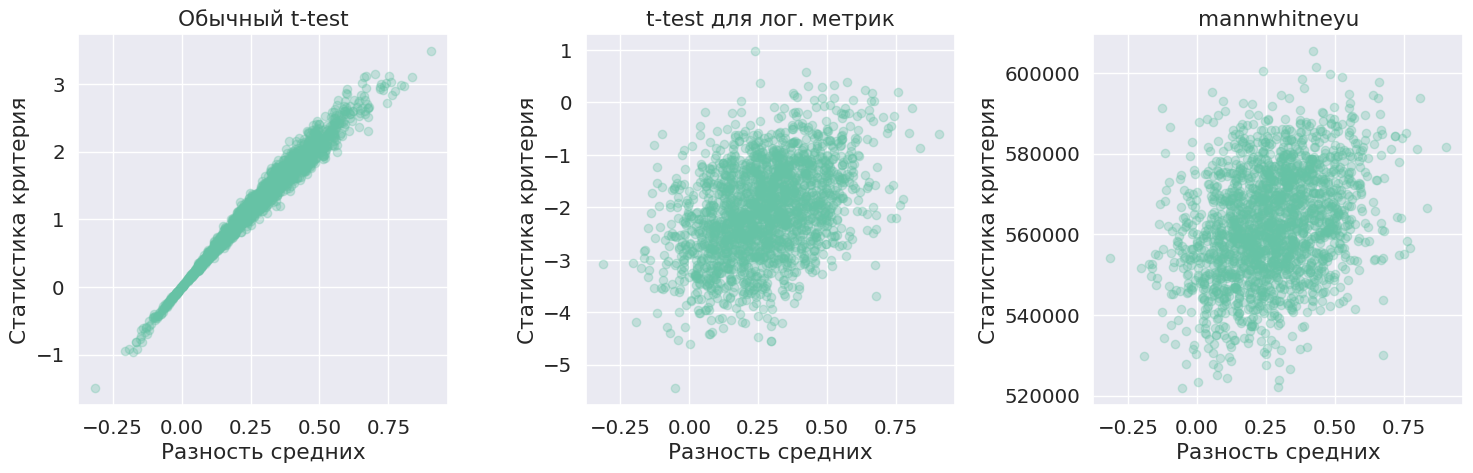

In [41]:
plt.figure(figsize=(15, 5))
titles = [
    'Обычный t-test',
    't-test для лог. метрик',
    'mannwhitneyu',
]

for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.scatter(diff_array, stats_array[i], alpha=0.3)
    plt.title(titles[i])
    plt.xlabel('Разность средних')
    plt.ylabel('Статистика критерия')

plt.tight_layout()

Проинтерпретируйте результаты

**Ответ:**

*обычный t-test:* есть линейная зависимость между разностью средних и статистикой


*t-test для логарифмической метрики:*
имеет более равномерное распределение статистики.

*критерий Манна-Уитни:*
не чувствителен к разности средних значений выборок.
имеет более равномерное распределение статистики .


**4.** И в заключении посмотрим как эти критерии контролируют ошибку первого рода. Для этого проведите серию АА-тестов. Код уже реализован, вам остается лишь передать в него необходимые параметры

In [42]:
def calculate_real_alpha(n_reject, n_iter):
    '''
    Оценка реального уровня значимости и его дов. интервала.
    Используется для оценки вероятности ошибки первого рода и мощности

    Аргументы:
    n_reject -- количество отвержений H_0 в эксперименте
    n_iter -- количество экспериментов

    Возвращает:
    real_alpha -- оценка реального уровня значимости
    left_bound, right_bound -- границы соотв. дов. интервала
    '''

    real_alpha = n_reject / n_iter
    std = np.sqrt(real_alpha * (1-real_alpha) / n_iter)
    left_bound = real_alpha - 2 * std
    right_bound = real_alpha + 2 * std

    return real_alpha, left_bound, right_bound


def draw_interval(
    real_alpha, left_bound, right_bound,
    alpha=0.05, new_fig=True
):
    '''
    Отрисовка интервала для вероятности отвержения критерия

    Аргументы:
    real_alpha -- оценка реального уровня значимости
    left_bound, right_bound -- границы дов. интервала
    alpha -- теоретический уровень значимости
    new_fig -- coздавать ли новую matplotlib figure
    '''

    if new_fig:
        plt.figure(figsize=(7, 3.5))

    plt.hlines(0, 0, 1,
               color='black', lw=2, alpha=0.6)
    plt.vlines(alpha, -1, 1,
               color='red', lw=2, linestyle='--', alpha=0.6)
    plt.fill_between([left_bound, right_bound], [0.1]*2, [-0.1]*2,
                     color='green', alpha=0.6)
    plt.scatter(real_alpha, 0, s=300, marker='*', color='red')
    plt.xlim((min(alpha, left_bound)-1e-3, max(alpha, right_bound)+1e-3))
    plt.title(
            f'Доля отвержений = {100*real_alpha:.2f}%, '
            f'интервал ({100*left_bound:.2f}%, {100*right_bound:.2f}%)'
        )
    plt.ylim((-0.5, 0.5))
    plt.yticks([])

In [112]:
def AB_test(test, add_logarithm = False, alternative='two-sided', n_iter=10_000, sample_size=1_000, alpha=0.05
):
    '''
    Проведение серии AB-тестов на искусственных выборках.

    Аргументы:
    test -- валидируемый тест из scipy.stats
    add_logarithm -- нужно ли логарифмировать метрику
    alternative -- альтернативная гипотеза
    n_iter -- количество итераций
    sample_size -- размер выборок
    alpha -- уровень значимости
    '''

    n_reject = 0  # количество отвержений H_0

    # Проведение экспериментов
    for _ in tqdm(range(n_iter)):
        x = generate_mix_expon(sample_sizes=[1000, 100], scale=[1, 15])
        y = generate_mix_expon(sample_sizes=[1000, 100], scale=[1.2, 10])
        if add_logarithm:
            n_reject += (test(np.log(x), np.log(y), alternative=alternative)[1] < alpha)
        else:
            n_reject += (test(x, y, alternative=alternative)[1] < alpha)

    # Реальный уровень значимости
    real_alpha, left_bound, right_bound = calculate_real_alpha(n_reject, n_iter)
    print('{:.4f} +/- {:.4f}'.format(
        real_alpha, (right_bound - left_bound)/2
    ))

    plt.figure(figsize=(14, 3.5))


    # График интервала
    with sns.axes_style("whitegrid"):
        plt.subplot(1, 2, 2)
        draw_interval(
            real_alpha, left_bound, right_bound,
            alpha=alpha, new_fig=False
        )

    plt.tight_layout()

In [113]:
n_iter = 20000  # количество итераций в одном эксперименте
alpha = 0.05  # уровень значимости

100%|██████████| 10000/10000 [00:24<00:00, 400.56it/s]


0.1445 +/- 0.0070


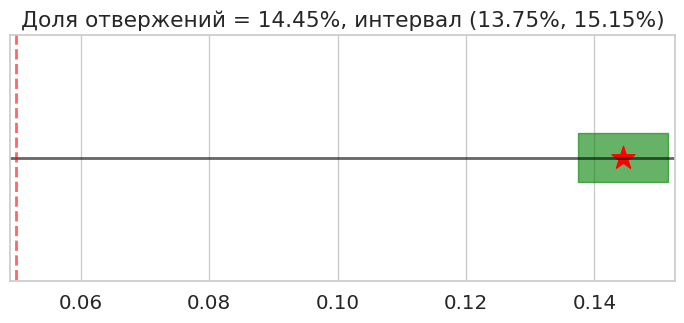

In [114]:
# Обычный T-test
AB_test(ttest_ind, alternative='two-sided')

100%|██████████| 10000/10000 [00:25<00:00, 394.49it/s]


0.5419 +/- 0.0100


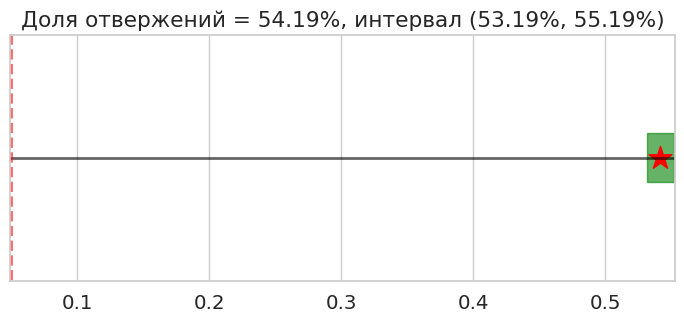

In [115]:
# T-test c логарифмированной метрикой
AB_test(ttest_ind, add_logarithm = True, alternative='two-sided')

100%|██████████| 10000/10000 [00:16<00:00, 618.67it/s]


0.8406 +/- 0.0073


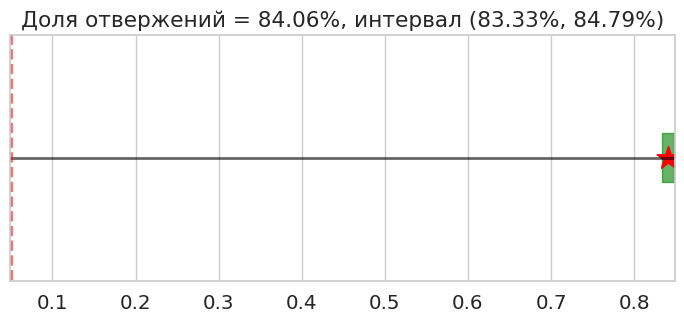

In [116]:
# Критерий М-У
AB_test(mannwhitneyu, alternative='two-sided')

**Вывод:**
> <b><i><font color="red"> а мы должны проводить АВ-тесты?</font></i></b> мы же хотим оценить ошибку 1 рода, в АА-тесте как раз то, что нам нужно, берем две выборки одинаковые, у нас есть $H_0$, которая заведомо верна (равенство средних), а в функции мы разнораспределенные выборки тестируем. и я не совсем понимаю :(
получается, просто смотрим накопление отвержений


*критерий Манна-Уитни* предполагает, что распределения имеют одинаковую форму, но могут быть смещены относительно друг друга, у нас это не так, по гистограммам видны различия в хвостах. Из-за этого доля отвержений огромная для уровня значимости 0.05.

для *логарифмированной метрики* доля отвережений меньше, чем у критерия Манна-Уитни, но всё равно значение плохо для уровня значимости 0.05.

для *обычного t-test* нужно нормальное распределение с одинаковой дисперсией, у нас экспоненциальное, поэтому результаты не корректны.




## <b><i><font color="orange">Сложная часть</font></i></b>

### Задача 4


Рассмотрим [данные по медицинским страховкам](https://www.kaggle.com/datasets/gauravduttakiit/medical-insurance-cost?select=Train_Data.csv):

Скачайте файл с тренировочными данными и оставьте колонку:
* `charges` &mdash; стоимость страховки человека.

In [6]:
df = pd.read_csv('/content/Train_Data.csv')
df.head()

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900


Министерство здравоохранения хочет провести AB-тест для оценки значимости эффекта от новых рекомендаций по употреблению витаминов и использовать для этого t-test независимых выборок. Ожидается, что новые рекомендации повысят здоровье общества и снизят траты на страховку. На время тестирования решено выдать рекомендации случайной группе из 1000 людей.

**1.**
Проведите 2000 случайных AA-тестов для проверки правильности работы t-test. Использовать нужно группы одинакого размера, конечно же, они не должны пересекаться. Используйте код с семинара (функция `AB_test` из предыдущей задачи в этом случае **НЕ** подойдет)

In [7]:
def relative_ttest(x, y, alpha=0.05):
    '''
    Относительный t-test.

    Аргументы:
    x, y -- выборки одинакового размера
    alpha -- уровень значимости

    Возвращает:
    stat -- статистика критерия
    pvalue
    left_bound, right_bound -- границы дов. интервала
    '''
    n = len(x)
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    stat = x_mean / y_mean - 1
    std = np.sqrt(np.var(x) / y_mean ** 2 + np.var(y) * x_mean ** 2 / y_mean ** 4)

    z_stat = np.sqrt(n) * np.abs(stat) / std
    pvalue = 2 * sps.norm.sf(z_stat)

    q = 1 / sps.norm.ppf(1-alpha/2)
    left_bound = stat - q * std / np.sqrt(n)
    right_bound = stat + q * std / np.sqrt(n)

    return stat, pvalue, left_bound, right_bound

In [36]:
def AB_test(
    sample, n_iter=10_000, sample_size=1_000, alpha=0.05
):
    '''
    Проведение серии AB-тестов на искусственных выборках.

    Аргументы:
    distr1, distr2 -- распределения для семплирования выборок
    n_iter -- количество итераций
    sample_size -- размер выборок
    alpha -- уровень значимости
    '''

    n_reject = 0  # количество отвержений H_0
    p_values = []
    # Проведение экспериментов
    for _ in tqdm(range(n_iter)):
      sample = charges.sample(n=group_size * 2, replace=False)
      control_group = sample.iloc[:group_size]
      test_group = sample.iloc[group_size:]
      t_stat, p_value = relative_ttest(control_group, test_group)[:2]
      p_values.append(p_value)
      n_reject += (relative_ttest(x, y)[1] < alpha)
    return p_values

In [37]:
charges = df['charges']
charges

group_size = 1000
p_values = []

p_values = AB_test(charges.sample(n=group_size * 2, replace=False), n_iter=2000, alpha=0.05)

100%|██████████| 2000/2000 [00:04<00:00, 494.73it/s]


Вспомните, какое распределение имеет величина p-value в случае, если нулевая гипотеза верна?

**Ответ:** $p(T(X)) \sim U[0, 1]$

Постройте гистограмму значений p-value. Корректно ли работает t-test на ваших данных?

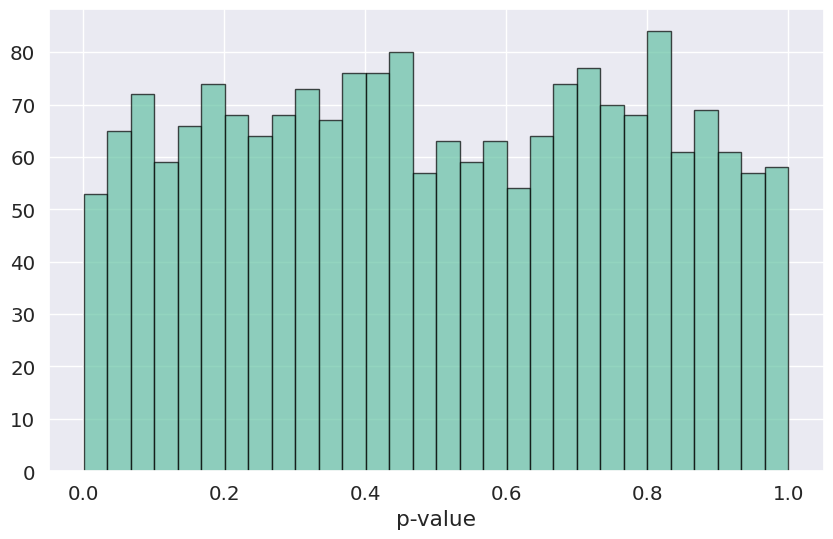

In [40]:
plt.figure(figsize=(10, 6))
plt.hist(p_values, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('p-value')
plt.show()

**Вывод:** как и ожидалось, распределение равномерное, значит, t-test работает корректно. то есть при верной нулевой гипотезе любое значение p-value от 0 до 1 равновероятно.

**2.** Зафиксируйте две выборки одинакового размера: контрольную и тестовую. С помощью проведения AB-теста выясните, какова мощность теста для разных значений эффекта, т.е. нарисуйте график зависимости мощности от значения добавляемого эффекта. Схема проведения аналогична предыдущему пункту, но к тестовой группе нужно добавить отрицательное смещение.

При добавлении искусственного смещения рекомендуется также добавлять небольшой шум для каждого человека. Шум необходимо добавлять для того, чтобы не происходило резкого смещения значения у всех элементов выборки, а постепенно менялось общее среднее. Сделайте выводы.


In [98]:
n_reject = []  # количество отвержений H_0
sample_size = 1000
shifts = np.linspace(0, 6000, 21)

for loc in tqdm(shifts):
    n_reject.append(0)
    for _ in range(1000):
      sample = charges.sample(n=group_size * 2, replace=False)
      control_group = sample.iloc[:group_size]
      test_group = control_group + loc +  sps.norm(loc=0, scale=1).rvs(size=group_size)
      n_reject[-1] += relative_ttest(control_group, test_group)[1] < alpha

100%|██████████| 21/21 [01:04<00:00,  3.08s/it]


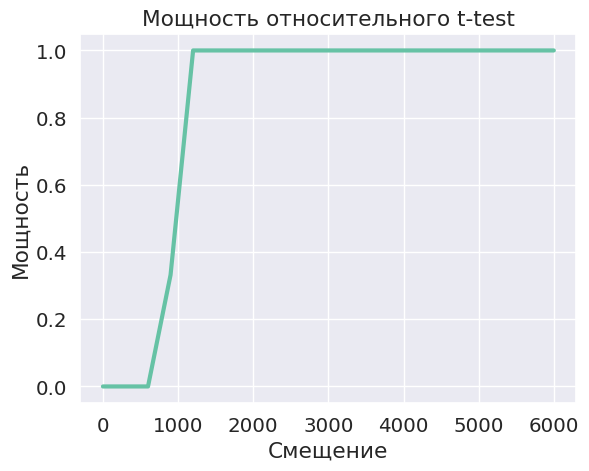

In [99]:
plt.plot(shifts, np.array(n_reject)/1000, lw=3)
plt.title('Мощность относительного t-test')
plt.xlabel('Смещение')
plt.ylabel('Мощность');

**Вывод:** мощность растет, потому что при добавлении смещения и шума данные проще различать